In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv(r"C:\Users\vyoms\Desktop\Sem 6\AI\Power_consumption\data\power_data.csv")
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,01-01-2017,9.675299,68.519306,0.315146,121.390771,25.993924,28465.23207,17737.79129,17868.79518
1,02-01-2017,12.476875,71.456319,0.076563,120.404486,27.227410,28869.49367,19557.72543,17820.76305
2,03-01-2017,12.100000,74.981667,0.076715,120.686014,28.574660,30562.44726,20057.26950,17620.80321
3,04-01-2017,10.509479,75.459792,0.082417,122.959319,28.827222,30689.83122,20102.07700,17673.69478
4,05-01-2017,10.866444,71.040486,0.083896,118.749861,29.741437,30802.91139,20033.94124,17664.17671


In [13]:
df.dtypes

DateTime                      object
Temperature                  float64
Humidity                     float64
Wind Speed                   float64
general diffuse flows        float64
diffuse flows                float64
Zone 1 Power Consumption     float64
Zone 2  Power Consumption    float64
Zone 3  Power Consumption    float64
dtype: object

In [17]:
import seaborn as sns

<AxesSubplot: xlabel='Temperature', ylabel='Zone 1 Power Consumption'>

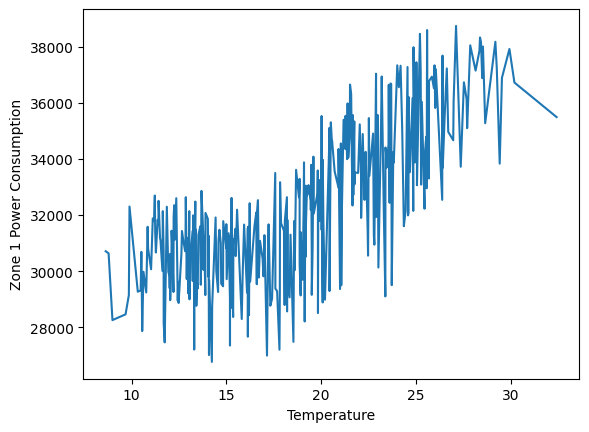

In [18]:
sns.lineplot(x=df['Temperature'], y=df['Zone 1 Power Consumption'])

     DateTime  Temperature   Humidity  Wind Speed  general diffuse flows  \
0  01-01-2017     9.675299  68.519306    0.315146             121.390771   
1  02-01-2017    12.476875  71.456319    0.076563             120.404486   
2  03-01-2017    12.100000  74.981667    0.076715             120.686014   
3  04-01-2017    10.509479  75.459792    0.082417             122.959319   
4  05-01-2017    10.866444  71.040486    0.083896             118.749861   

   diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
0      25.993924               28465.23207                17737.79129   
1      27.227410               28869.49367                19557.72543   
2      28.574660               30562.44726                20057.26950   
3      28.827222               30689.83122                20102.07700   
4      29.741437               30802.91139                20033.94124   

   Zone 3  Power Consumption  
0                17868.79518  
1                17820.76305  
2          

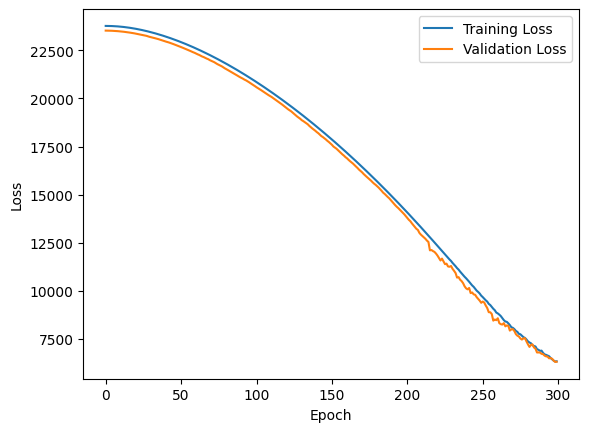

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import mean_absolute_error

# Load the dataset
# Assuming you have already loaded your dataset into a DataFrame called 'df'
# df = pd.read_csv("power_data.csv")

print(df.head())
# Separate features and target variable
X = df.iloc[:, 1:-3].values  # Features
y = df.iloc[:, -3:].values    # Target variable (power consumption for each zone)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model with dropout regularization
model = Sequential([
    LSTM(512, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True),
    Dropout(0.2),  # Increased dropout rate for regularization
    BatchNormalization(),  # BatchNormalization layer for stabilizing training
    LSTM(256, return_sequences=True),
    Dropout(0.2),
    BatchNormalization(),
    LSTM(128),
    Dropout(0.2),
    BatchNormalization(),
    Dense(3)
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # You can adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='mean_absolute_error')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=300, batch_size=8, validation_split=0.1)

# Evaluate the model
loss = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", loss)

# You can also plot the training and validation loss to visualize the model's performance during training
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
import numpy as np

# Assuming you have a trained model and a scaler object

# Define your input values
input_values = np.array([[9.675299, 68.519306, 0.315146, 121.390771, 25.993924]])

# Scale the input using the same scaler used for training
scaled_input_values = scaler.transform(input_values)

# Reshape the input for LSTM model
reshaped_input_values = scaled_input_values.reshape((scaled_input_values.shape[0], 1, scaled_input_values.shape[1]))

# Make predictions
predictions = model.predict(reshaped_input_values)

# Assuming scale_factors contains scale factors for the first 3 zones
# Placeholder for scale_factors, replace with actual values
scale_factors = [1.0, 1.0, 1.0]  # Placeholder values, replace with actual scale factors

scale_factors_selected = scale_factors[:predictions.shape[1]]

# Inverse transform the predictions to get actual values
actual_predictions = predictions * np.array(scale_factors_selected).reshape((-1, 1))

# Print the predictions for each zone
print("Predictions for Zone 1, Zone 2, and Zone 3 Power Consumption:")
print(actual_predictions[0])

1/1 [==============================] - 0s 25ms/step
Predictions for Zone 1, Zone 2, and Zone 3 Power Consumption:
[17945.69140625 17622.13476562 16452.32421875]


In [8]:
import joblib

# Save the model
joblib.dump(model, 'model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the scale_factors
joblib.dump(scale_factors, 'scale_factors.pkl')


['scale_factors.pkl']